## Credit Model

#### The Goal of the project is to build Supervised Machine Learning models to predict the Creditability of people applying for credit cards with a bank. The dataset has details of the exisitng customers of the bank with a credit card along with their payment history which indicates if they have defualted in the past. This data will be used to build train, and test the models and can help the banks make decissions about accepting or rejecting any new incoming applications for credit card.

### Part I: Building Machine Learning Models inclusive of all features

### Pre Processing

In [134]:
import pandas as pd

In [135]:
pwd

'/Users/pratik'

In [136]:
credit = pd.read_csv('credit.csv')

In [137]:
credit.dtypes

Creditability                        int64
Account Balance                      int64
Duration of Credit (month)           int64
Payment Status of Previous Credit    int64
Purpose                              int64
Credit Amount                        int64
Value Savings/Stocks                 int64
Length of current employment         int64
Instalment per cent                  int64
Sex & Marital Status                 int64
Guarantors                           int64
Duration in Current address          int64
Most valuable available asset        int64
Age (years)                          int64
Concurrent Credits                   int64
Type of apartment                    int64
No of Credits at this Bank           int64
Occupation                           int64
No of dependents                     int64
Telephone                            int64
Foreign Worker                       int64
dtype: object

In [138]:
credit.isnull().sum()


Creditability                        0
Account Balance                      0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Purpose                              0
Credit Amount                        0
Value Savings/Stocks                 0
Length of current employment         0
Instalment per cent                  0
Sex & Marital Status                 0
Guarantors                           0
Duration in Current address          0
Most valuable available asset        0
Age (years)                          0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
Telephone                            0
Foreign Worker                       0
dtype: int64

#### It appears from the above results that there are no no missing values, However, if we encounter any missing valueswe can use multiple imputatiuon methods to replace the missing data with either the mean or the median of the data depending on the distribution of the data. Since the datatypes of all the columns is integer, we can replace the mean values with either the mean or the median which are more relevant in statistical analysis. We may have some criteria to measure the missing values percentage, and if within acceptable range for the study under consideration, the missing values may be replaced.

In [139]:
target = credit['Creditability']


In [140]:
target.value_counts()

1    700
0    300
Name: Creditability, dtype: int64

In [141]:
credit.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


#### Randomization

In [142]:
import random
random.seed(123)
indx = random.sample(range(0, 1000), 1000) 
credit_rand = credit.iloc[indx] 
target_rand = target.iloc[indx]

In [143]:
credit_rand.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


#### On comparison after randomization it can be seen that the summary of the variables with reference to the mean,standard Deviation, Median, Minimum and Maximum values for each column before and after randomization is the same.

### Decision Tree Model

In [144]:
from sklearn.model_selection import train_test_split
y = target
x = credit.drop(['Creditability'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 52)

In [145]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)

In [146]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_predict = model.predict(x_test)
print(confusion_matrix(y_test, y_predict))

[[ 45  39]
 [ 57 159]]


In [147]:
print(accuracy_score(y_test, y_predict)*100)

68.0


#### The accuracy for the model usign Decision Tree Classifier is 67.66%

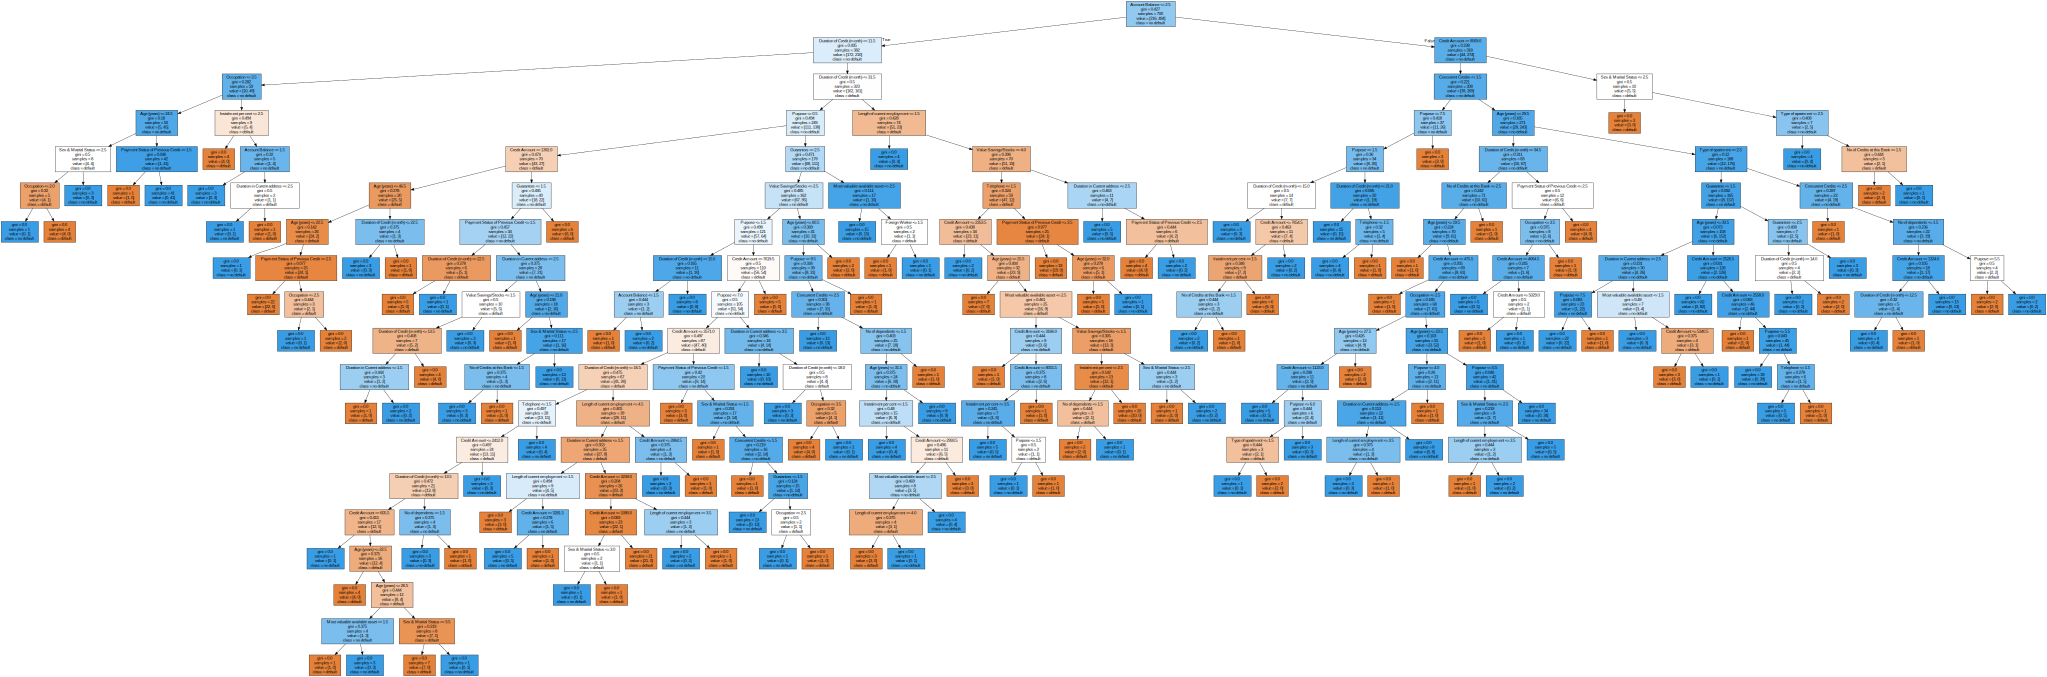

In [148]:
#To visualize the model, we can use
#conda install python-graphviz used in anaconda command prompt to install graphviz

from IPython.display import SVG
from graphviz import Source
from IPython.display import display 
graph = Source(tree.export_graphviz(model, out_file = None, 
                                    feature_names = x.columns, 
                                    class_names = ['default', 'no default'], filled = True))
display(SVG(graph.pipe(format = 'svg')))

### Random Forest

In [149]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [150]:
y_predict = clf.predict(x_test)
print(confusion_matrix(y_test, y_predict))

[[ 38  46]
 [ 30 186]]


In [151]:
print(accuracy_score(y_test, y_predict)*100)

74.66666666666667


#### The accuracy increased to 74% when we used Random Forest Algorithn

### Gaussian Naive Bayes Model

#### Splitting into Training and Test Data Sets

In [152]:
from sklearn.model_selection import train_test_split
y = target
x = credit.drop(['Creditability'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 123)

#### The data after randomization is split into 75% Training Data and 25% Test Data Set, with a random seed of 123.

#### Percentage of Targets for Training and Test Data Sets

In [153]:
y_train.value_counts() / y_train.shape

1    0.713333
0    0.286667
Name: Creditability, dtype: float64

In [154]:
y_test.value_counts() / y_test.shape

1    0.66
0    0.34
Name: Creditability, dtype: float64

#### It appears that for the trainiing data set, the percentage of targets(Creditability) with Crediatability score 1 was 71 % and that with score 0 was 29%.For the Test Data Set, the percentage of targets with Creditability score 1 was 66% and with Creditability score 0 was 34%

### Model Training

In [155]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(x_train, y_train)

### Model Evaluation

In [156]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_predict = gnb.predict(x_test)

In [157]:
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict)*100)

[[ 60  25]
 [ 34 131]]
76.4


#### The Evaluation shows 60 True Positives and 113 True Negatives out of all predictions with an accuracy of 76%. The accuracy for Gaussian Naive Bayes was the highest compared to the Decision Tree and Random Forest models.

## Part II: Improving Performance by dropping highly correlated features

#### Feature Correlation

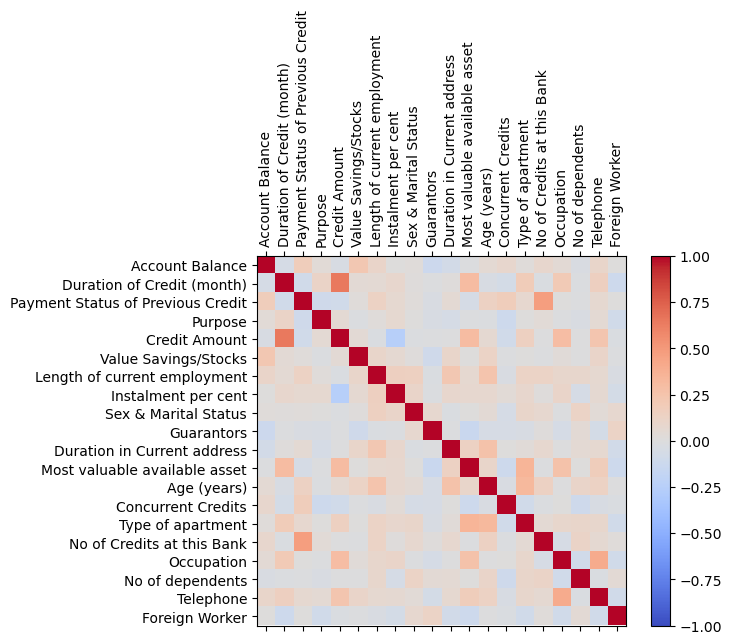

In [158]:
import matplotlib.pyplot as plt
import numpy as np
corr = x_train.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1) 
fig.colorbar(cax)
ticks = np.arange(0,len(x_train.columns),1) 
ax.set_xticks(ticks)
plt.xticks(rotation=90) 
ax.set_yticks(ticks) 
ax.set_xticklabels(x_train.columns) 
ax.set_yticklabels(x_train.columns) 
plt.show()

#### Removing the highgly Correlated Variables

#### Create Correlation Matrix

In [71]:
corr_matrix = x.corr().abs()

#### Select Upper triangle of correlation matrix

In [72]:
import numpy as np
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape) , k=1).astype(np.bool))

/var/folders/fp/szpx3gxd4ln849f9dbx_lqw00000gn/T/ipykernel_1760/2665990962.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape) , k=1).astype(np.bool))


In [73]:
upper

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
Account Balance,NaN,0.072013,0.192191,0.028783,0.042695,0.222867,0.106339,0.005280,0.043261,0.127737,0.042234,0.032260,0.058631,0.068274,0.023335,0.076005,0.040663,0.014145,0.066296,0.035187
Duration of Credit (month),NaN,NaN,0.077186,0.147492,0.624988,0.047661,0.057381,0.074749,0.014789,0.024490,0.034067,0.303971,0.037550,0.062884,0.153126,0.011284,0.210910,0.023834,0.164718,0.134680
Payment Status of Previous Credit,NaN,NaN,NaN,0.090336,0.059915,0.039058,0.138225,0.044375,0.042171,0.040676,0.063198,0.053777,0.146337,0.159957,0.061428,0.437066,0.010350,0.011550,0.052370,0.028554
Purpose,NaN,NaN,NaN,NaN,0.068480,0.018684,0.016013,0.048369,0.000157,0.017607,0.038221,0.010966,0.000892,0.100230,0.013495,0.054935,0.008085,0.032577,0.078371,0.113244
Credit Amount,NaN,NaN,NaN,NaN,NaN,0.064632,0.008376,0.271322,0.016094,0.027831,0.028917,0.311602,0.032273,0.069392,0.133024,0.020785,0.285393,0.017144,0.277000,0.030662
Value Savings/Stocks,NaN,NaN,NaN,NaN,NaN,NaN,0.120950,0.021993,0.017349,0.105069,0.091424,0.018948,0.083434,0.001908,0.006644,0.021644,0.011709,0.027514,0.087208,0.010450
Length of current employment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.126161,0.111278,0.008116,0.245081,0.087187,0.259116,0.007279,0.115077,0.125791,0.101225,0.097192,0.060518,0.022845
Instalment per cent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.119308,0.011398,0.049302,0.053391,0.057271,0.007894,0.091229,0.021669,0.097755,0.071207,0.014413,0.094762
Sex & Marital Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050634,0.027269,0.006940,0.005150,0.026747,0.098934,0.064672,0.011956,0.122165,0.027275,0.073103
Guarantors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025678,0.155450,0.029826,0.038235,0.065449,0.025447,0.057963,0.020400,0.075035,0.140190


#### Find index of feature columns with correlation greater than 0.95

In [74]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]
xnew = x.drop(to_drop, axis = 1)

In [75]:
xnew

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,18,4,2,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,9,4,0,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,2,12,2,9,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,12,4,0,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,12,4,0,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1,3,2,3,1,4,1,21,3,1,1,2,2,1,1
996,1,24,2,0,1,5,4,3,2,1,1,45,3,2,1,3,1,1,1
997,4,21,4,0,5,5,4,3,1,4,4,30,3,3,1,4,1,2,1
998,2,12,2,3,5,1,2,3,1,1,4,52,3,2,1,4,1,2,1


#### New Accuracy with new Xnew(after dropping highly correlated variables)


#### Using Xnew(after dropping highly correlated var) for randomising, Splitting, Training model and evaluating

In [76]:
to_drop

['Credit Amount']

#### Dropping "Credit Amount",  which has high correlation with one of the Independent Variables

In [77]:
credit_new = credit.drop(columns="Credit Amount")

In [78]:
credit_new.dtypes

Creditability                        int64
Account Balance                      int64
Duration of Credit (month)           int64
Payment Status of Previous Credit    int64
Purpose                              int64
Value Savings/Stocks                 int64
Length of current employment         int64
Instalment per cent                  int64
Sex & Marital Status                 int64
Guarantors                           int64
Duration in Current address          int64
Most valuable available asset        int64
Age (years)                          int64
Concurrent Credits                   int64
Type of apartment                    int64
No of Credits at this Bank           int64
Occupation                           int64
No of dependents                     int64
Telephone                            int64
Foreign Worker                       int64
dtype: object

In [79]:
target_new = credit_new['Creditability']

In [80]:
credit_new.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


#### Randomization

In [81]:
import random
random.seed(123)
indx = random.sample(range(0, 1000), 1000) 
credit_new_rand = credit_new.iloc[indx] 
target_new_rand = target_new.iloc[indx]

In [82]:
credit_new_rand.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


#### As seen above, Randomized credit_new data has similar statistical parameters as before randomizing

#### Train Test Split

In [83]:
y = target_new
x = xnew
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 123)

#### Percentage of Targets for Training and Test

In [84]:
y_train.value_counts() / y_train.shape

1    0.713333
0    0.286667
Name: Creditability, dtype: float64

In [85]:
y_test.value_counts() / y_test.shape

1    0.66
0    0.34
Name: Creditability, dtype: float64

####  It appears that for the trainiing data set, the percentage of targets(Creditability) with Crediatability score 1 was 71 % and that with score 0 was 29%. For the Test Data Set, the percentage of targets with Creditability score 1 was 66% and with Creditability score 0 was 34%.

### Decision Tree Model

In [89]:
# Design Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [90]:
model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)

#### To visualize the model we can use "conda install python-graphviz",  in anaconda command prompt to install graphviz

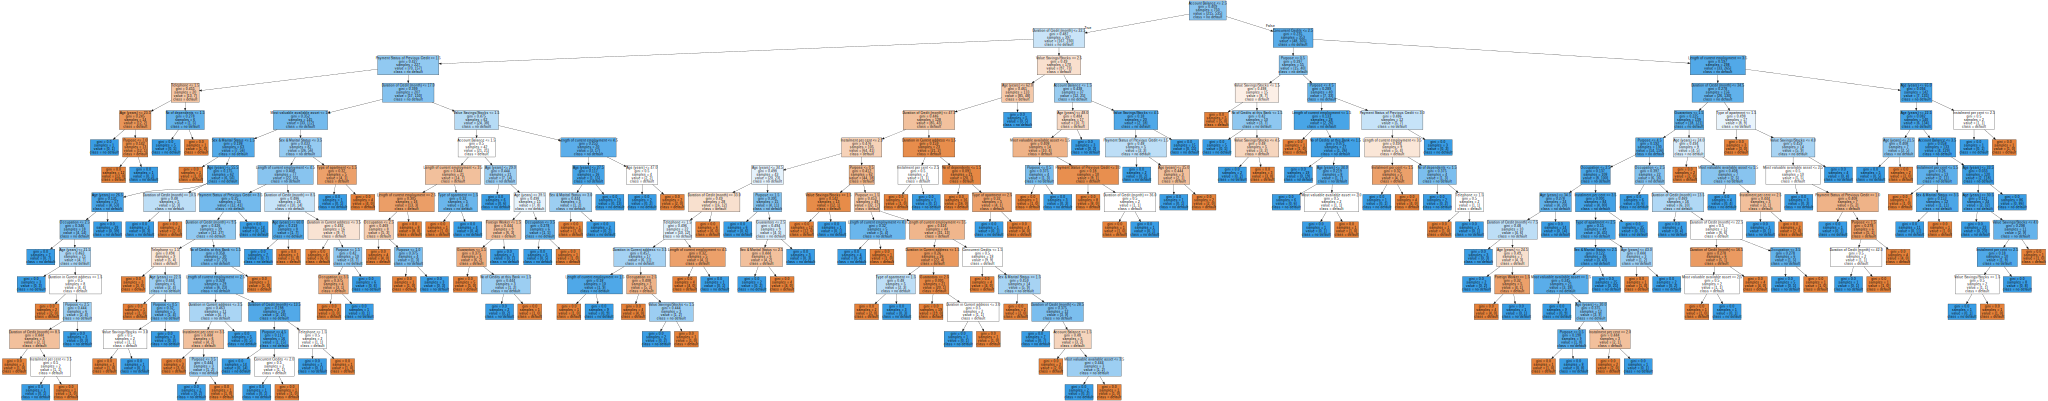

In [91]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display 
graph = Source(tree.export_graphviz(model, out_file = None, 
                                    feature_names = x.columns, 
                                    class_names = ['default', 'no default'], filled = True))
display(SVG(graph.pipe(format = 'svg')))

In [92]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_predict = model.predict(x_test)
print(confusion_matrix(y_test, y_predict))

[[ 49  36]
 [ 33 132]]


In [93]:
print(accuracy_score(y_test, y_predict)*100)

72.39999999999999


### Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [95]:
y_predict = clf.predict(x_test)
print(confusion_matrix(y_test, y_predict))

[[ 35  50]
 [ 15 150]]


In [96]:
print(accuracy_score(y_test, y_predict)*100)

74.0


### Gausian Naive Bayes

#### Model Training

In [99]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(x_train, y_train)

#### Model Evaluation

In [101]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_predict = gnb.predict(x_test)

In [102]:
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict))

[[ 65  20]
 [ 37 128]]
0.772


#### On dropping the correlated features, the accuracy of Decision Tree model increased from 68% to 72%, and that for Gaussian Naive Bayes model increased from 76% to 77%. The Gaussian Naive Bayes models gave the highest accuracy amongst all models considered in both parts, before and after dropping the highly correlated variables.